In [63]:
import numpy as np
import matplotlib.pyplot as plt
#%pip install opencv-python
# Required to import cv2 !!!
import cv2

import os
import time

In [64]:
def NMF(A, d, delta = 1.e-9, maxiter = 1000, seed = 0):
    """
    Takes in a matrix A and returns an NMF factorization and an array of the 
    Frobenius norm of the difference between A and the NMF.
    input:
        A: (m,n) input array
        d: integer, Number of components we want to decompose A into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
        norms: (maxiter) array
    """
    
    m, n = np.shape(A)
    norms = np.zeros(maxiter)
    
    if seed != 0:
        np.random.seed(seed)
    
    W = np.random.uniform(0.0, 0.1, m*d).reshape((m,d))*np.sqrt(np.mean(A)/d)
    H = np.random.uniform(0.0, 0.1, d*n).reshape((d,n))*np.sqrt(np.mean(A)/d)
    
    for k in range(1,maxiter):
        H = np.multiply(H, np.divide(W.T@A,W.T@W@H+delta))
        W = np.multiply(W, np.divide(A@H.T,W@H@H.T+delta))
        norms[k] = np.linalg.norm(A-W@H,'fro')
    
    return W, H, norms

In [65]:
A1 = np.array([[1,0], 
               [0,1]], dtype='float')

A2 = np.array([[1,2], 
               [1,1],
               [1,2]], dtype='float')

A3 = np.array([[2,1,1], 
               [2,1,1],
               [1,1,2]], dtype='float')

A4 = np.array([[2,1,0], 
               [1,2,3],
               [0,3,3]], dtype='float')

In [10]:
#Oppgave 1f
print(np.linalg.eig(A3))
print('-------------------------------------------------------------------------------------------------------------')
print(np.linalg.eig(A4))

(array([ 4.00000000e+00,  1.00000000e+00, -6.15346177e-16]), array([[ 0.57735027,  0.40824829,  0.30151134],
       [ 0.57735027,  0.40824829, -0.90453403],
       [ 0.57735027, -0.81649658,  0.30151134]]))
-------------------------------------------------------------------------------------------------------------
(array([-0.75770177,  2.09911499,  5.65858678]), array([[-0.27264929, -0.94543361,  0.17837501],
       [ 0.75188543, -0.09370664,  0.65260047],
       [-0.60027549,  0.31204863,  0.73640681]]))


From the result of the np.linalg.eig() function on the two matrices, we see that matrix A3 has a rank of 2 and that matrix A4 has a rank of 3. This is because matrix A3 has a eigenvalue approximately to zero (-6.1534*e-16). Matrix A4 on the other side, only have positive eigenvalues, so that means it's rank is 3 since it's a 3x3-matrix. 

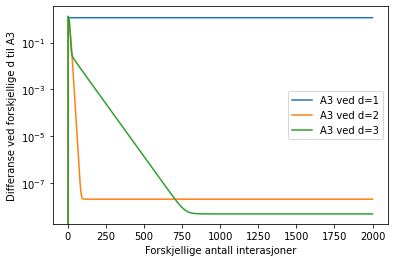

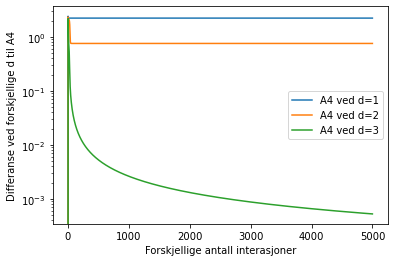

In [88]:
#Oppgave 1g
W1_A3, H2_A3, norm1_A3 = NMF(A3, 1, maxiter=2000)
W2_A3, H2_A3, norm2_A3 = NMF(A3, 2, maxiter=2000)
W3_A3, H3_A3, norm3_A3 = NMF(A3, 3, maxiter=2000)

plt.plot(norm1_A3, label = 'A3 ved d=1')
plt.plot(norm2_A3, label = 'A3 ved d=2')
plt.plot(norm3_A3, label = 'A3 ved d=3')

plt.ylabel('Differanse ved forskjellige d til A3')
plt.xlabel('Forskjellige antall interasjoner')
plt.legend(loc = 5)
plt.yscale("log")
plt.show()

W1_A4, H2_A4, norm1_A4 = NMF(A4, 1, maxiter=5000)
W2_A4, H2_A4, norm2_A4 = NMF(A4, 2, maxiter=5000)
W3_A4, H3_A4, norm3_A4 = NMF(A4, 3, maxiter=5000)

plt.plot(norm1_A4, label = 'A4 ved d=1')
plt.plot(norm2_A4, label = 'A4 ved d=2')
plt.plot(norm3_A4, label = 'A4 ved d=3')

plt.ylabel('Differanse ved forskjellige d til A4')
plt.xlabel('Forskjellige antall interasjoner')
plt.legend(loc = 5)
plt.yscale("log")
plt.show()


From the graph we can see that equation 17 is satisfied, A-Wk+1*Hk+1 <= A-Wk*Hk, for all both A3 and A4 for all the different values of D. From the plot of A3 (rank 2) we can see that we get a lower difference (error) and a slower convergence the higher the d is. For example, with d = 1 we get a really big difference, but a really fast (less iterations) convergence towards that difference value. The same thing applies with A4 (rank 3), but here the difference between d=2 and d=3 is really big.

In [77]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

# Number of faces to keep in final array
N = 500

# Load all 10000 images
faces = load_images(10000)

# Select N random images
choices = np.random.choice(faces.shape[-1],N, replace = False)
faces = faces[:,:,:,choices]

# Check that the shape is correct
print(faces.shape)

(24, 24, 4, 500)


In [76]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams

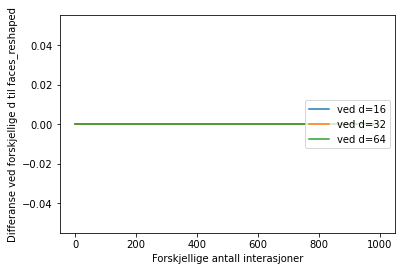

In [78]:
faces_opacity = faces[:,:,3,:]
faces_rgb = faces[:,:,:3,:]
shape = faces_rgb.shape

faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)

#Oppgave 2e

W16, H16, diff16 = NMF(faces_reshaped, 16)
W32, H32, diff32 = NMF(faces_reshaped, 32)
W64, H64, diff64 = NMF(faces_reshaped, 64)

plt.plot(diff16, label = 'ved d=16')
plt.plot(diff32, label = 'ved d=32')
plt.plot(diff64, label = 'ved d=64')


plt.ylabel('Differanse ved forskjellige d til faces_reshaped')
plt.xlabel('Forskjellige antall interasjoner')
plt.legend(loc = 5)
#plt.yscale("log")
plt.show()